# Business Problem

1. **Objective**
   - To assess if a customer's license should be issued(AAI), renewed(REV) or cancelled(AAC) depending on various parameters
   - Learn from various features of applications rejected or given in the past to come up with a decision


2. **Machine Learning Problem**
   - Develop a machine learning model to learn relation of the target variable with the set of features available from the training data


3. **Technology**
   - Python, h2O, Scikit-learn, tensorflow, keras, Pandas, Numpy
   

4. **Decision making**
   - Select the best model which performs the best w.r.t better accuracy
   - Metrics: Accuracy
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real time in assessing a customer's license worthiness

### Import Libraries

In [26]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 mins 57 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_jacob_gp4osy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.714 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [28]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Load in Data

In [29]:
df = pd.read_csv("Data/License_Data.csv.xls")
df.head()

/var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/ipykernel_77128/3556164403.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/License_Data.csv.xls")


,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,LICENSE_NUMBER,APPLICATION_TYPE,APPLICATION_CREATED_DATE,APPLICATION_REQUIREMENTS_COMPLETE,PAYMENT_DATE,CONDITIONAL_APPROVAL,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE_STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


### EDA

In [30]:
# Check df shape
df.shape

(85895, 32)

In [31]:
# Check the value count of our target variable
df.LICENSE_STATUS.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE_STATUS, dtype: int64

In [32]:
# Limit the License Status to the 3 most common categrories
df = df[df.LICENSE_STATUS.isin(['AAI', 'AAC', 'REV'])]

In [33]:
# Check nulls
df.isnull().sum()

ID                                       0
LICENSE_ID                               0
ACCOUNT_NUMBER                           0
SITE_NUMBER                              0
LEGAL_NAME                               0
DOING_BUSINESS_AS_NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP_CODE                                31
WARD                                 49699
PRECINCT                             56699
WARD_PRECINCT                        49698
POLICE_DISTRICT                      54010
LICENSE_CODE                             0
LICENSE_DESCRIPTION                      0
LICENSE_NUMBER                           1
APPLICATION_TYPE                         0
APPLICATION_CREATED_DATE             64657
APPLICATION_REQUIREMENTS_COMPLETE      214
PAYMENT_DATE                          1287
CONDITIONAL_APPROVAL                     0
LICENSE_TERM_START_DATE                228
LICENSE_TER

In [34]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85890 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85890 non-null  object 
 1   LICENSE_ID                         85890 non-null  int64  
 2   ACCOUNT_NUMBER                     85890 non-null  int64  
 3   SITE_NUMBER                        85890 non-null  int64  
 4   LEGAL_NAME                         85890 non-null  object 
 5   DOING_BUSINESS_AS_NAME             85889 non-null  object 
 6   ADDRESS                            85890 non-null  object 
 7   CITY                               85890 non-null  object 
 8   STATE                              85890 non-null  object 
 9   ZIP_CODE                           85859 non-null  object 
 10  WARD                               36191 non-null  float64
 11  PRECINCT                           29191 non-null  flo

In [35]:
df.nunique()

ID                                   85890
LICENSE_ID                           85890
ACCOUNT_NUMBER                       38895
SITE_NUMBER                            177
LEGAL_NAME                           38742
DOING_BUSINESS_AS_NAME               41684
ADDRESS                              42143
CITY                                  1223
STATE                                   54
ZIP_CODE                              2456
WARD                                    50
PRECINCT                                76
WARD_PRECINCT                         2383
POLICE_DISTRICT                         28
LICENSE_CODE                           106
LICENSE_DESCRIPTION                    106
LICENSE_NUMBER                       49764
APPLICATION_TYPE                         5
APPLICATION_CREATED_DATE              2899
APPLICATION_REQUIREMENTS_COMPLETE     3078
PAYMENT_DATE                          4356
CONDITIONAL_APPROVAL                     2
LICENSE_TERM_START_DATE               2825
LICENSE_TER

<AxesSubplot: xlabel='LICENSE_STATUS', ylabel='count'>

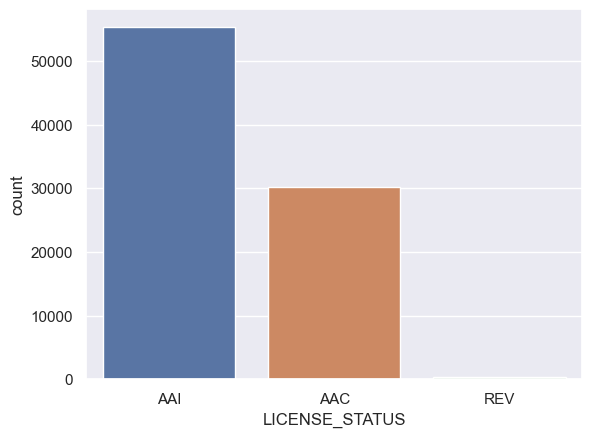

In [36]:
# Plot the counts of License Status
sns.set_theme(style="darkgrid")
sns.countplot(x = df.LICENSE_STATUS)

### Data Cleaning

In [37]:
df['LEGAL_BUSINESS_NAME_MATCH'] = df.apply(lambda x: 1 if str(x['LEGAL_NAME'].upper()) in str(x['DOING_BUSINESS_AS_NAME']).upper()
                                        or str(x['DOING_BUSINESS_AS_NAME']).upper() in str(x['LEGAL_NAME']).upper() else 0,
                                        axis=1)

In [38]:
df.LICENSE_DESCRIPTION.value_counts()

Limited Business License                                        50077
Home Repair                                                     10632
Peddler, non-food                                                2812
Home Occupation                                                  2809
Retail Food Establishment                                        2320
Massage Therapist                                                1952
Street Performer                                                 1889
Scavenger, Private                                               1549
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Motor Vehicle Repair : Engine Only (Class II)                     931
Automatic Amusement Device Operator                               773
Peddler, food (fruits and vegtables only)                         582
Mobile Food Dispenser                                             525
Manufacturing Establ

In [39]:
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
df['LICENSE_DESCRIPTION'] = df['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [40]:
df.LICENSE_DESCRIPTION.nunique()

92

In [41]:
df['LEGAL_NAME'] = df['LEGAL_NAME'].str.replace('.', '', regex=False)
df['DOING_BUSINESS_AS_NAME'] = df['DOING_BUSINESS_AS_NAME'].str.replace('.', '', regex=False)

df['BUSINESS_TYPE'] = 'PVT'

df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('INC'), 'INC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('INCORPORATED'), 'INC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('INC'), 'INC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('INCORPORATED'), 'INC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('LLC'), 'LLC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('LLC'), 'LLC', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('CO'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('CORP'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('CORPORATION'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('CO'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('CORP'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('CORPORATION'), 'CORP', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('LTD'), 'LTD', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['LEGAL_NAME'].str.contains('LIMITED'), 'LTD', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('LTD'), 'LTD', df['BUSINESS_TYPE'])
df['BUSINESS_TYPE'] = np.where(df['DOING_BUSINESS_AS_NAME'].str.contains('LIMITED'), 'LTD', df['BUSINESS_TYPE'])

In [42]:
df.BUSINESS_TYPE.value_counts()

CORP    27763
PVT     27020
INC     24443
LLC      5048
LTD      1616
Name: BUSINESS_TYPE, dtype: int64

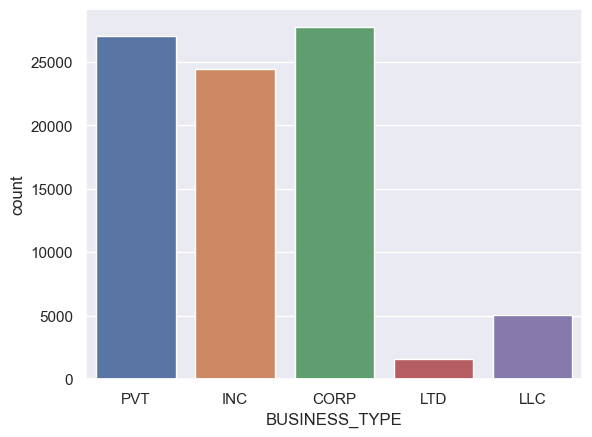

In [43]:
sns.countplot(x=df.BUSINESS_TYPE)
plt.show()

In [44]:
df.ZIP_CODE.value_counts()

60804      1142
60647.0     925
60618       889
60639       878
60007       789
           ... 
90605         1
57108         1
52358         1
16801         1
61115.0       1
Name: ZIP_CODE, Length: 2456, dtype: int64

In [45]:
df['ZIP_CODE'].fillna(-1, inplace=True)
df['ZIP_CODE_MISSING'] = df.apply(lambda x: 1 if x['ZIP_CODE'] == -1 else 0, axis=1)

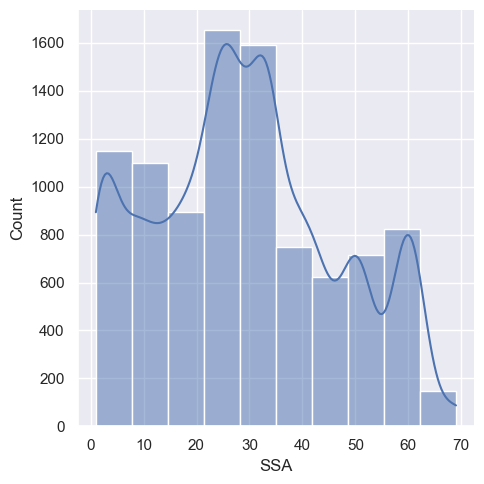

In [46]:
sns.displot(data=df, x="SSA", bins=10, kde=True)

In [47]:
df['SSA'].fillna(-1, inplace=True)

In [48]:
df['APPLICATION_REQUIREMENTS_COMPLETE'].fillna(-1, inplace=True)
df['APPLICATION_REQUIREMENTS_COMPLETE'] = df.apply(lambda x: 0 if x['APPLICATION_REQUIREMENTS_COMPLETE'] == -1 
                                                     else 1, axis=1)